<a href="https://colab.research.google.com/github/sourcecode369/TensorFlow-2.0/blob/master/tensorflow_2.0_docs/TensorFlow%20Core/Tutorials/Images/Visualizing%20Convolutional%20Neural%20Network%20Layers/VGG_with_Attention_Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rhtsingh","key":"05e5c425aae6dfba32a031192446751a"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c plant-seedlings-classification

  0% 0.00/5.13k [00:00<?, ?B/s]
100% 5.13k/5.13k [00:00<00:00, 9.04MB/s]
 94% 81.0M/86.0M [00:02<00:00, 38.8MB/s]
100% 86.0M/86.0M [00:02<00:00, 42.5MB/s]
 99% 1.59G/1.60G [00:39<00:00, 36.8MB/s]
100% 1.60G/1.60G [00:39<00:00, 43.7MB/s]


In [4]:
!ls

kaggle.json  sample_data  sample_submission.csv.zip  test.zip  train.zip


In [5]:
!unzip test.zip
!unzip train.zip

Archive:  test.zip
   creating: test/
  inflating: test/c0461776c.png      
  inflating: test/4bbfd1e05.png      
  inflating: test/1d0cbd819.png      
  inflating: test/93079d970.png      
  inflating: test/856f2910a.png      
  inflating: test/976e4e079.png      
  inflating: test/b31292706.png      
  inflating: test/29bab7cad.png      
  inflating: test/37297a64c.png      
  inflating: test/f2dc546ca.png      
  inflating: test/b6a3f7876.png      
  inflating: test/8874bba69.png      
  inflating: test/1459e96a0.png      
  inflating: test/9a3f20121.png      
  inflating: test/5315c2dca.png      
  inflating: test/b7a7f6390.png      
  inflating: test/20e562fd5.png      
  inflating: test/e3f50adfc.png      
  inflating: test/6ba4ef411.png      
  inflating: test/acdb75e00.png      
  inflating: test/e0ec5b6a1.png      
  inflating: test/219fd68d5.png      
  inflating: test/41f1c3cdb.png      
  inflating: test/8c98a6e9b.png      
  inflating: test/1bf9b94a6.png      
  inflating:

In [6]:
!ls -GFlash --color

total 1.7G
4.0K drwxr-xr-x  1 root 4.0K Oct 28 15:48 ./
4.0K drwxr-xr-x  1 root 4.0K Oct 28 15:45 ../
4.0K drwxr-xr-x  1 root 4.0K Oct 25 16:58 .config/
4.0K -rw-r--r--  1 root   64 Oct 28 15:47 kaggle.json
4.0K drwxr-xr-x  1 root 4.0K Oct 25 16:58 sample_data/
8.0K -rw-r--r--  1 root 5.2K Oct 28 15:47 sample_submission.csv.zip
 36K drwxrwxr-x  2 root  36K Nov 21  2017 test/
 86M -rw-r--r--  1 root  86M Oct 28 15:47 test.zip
4.0K drwxrwxr-x 14 root 4.0K Nov 21  2017 train/
1.7G -rw-r--r--  1 root 1.7G Oct 28 15:48 train.zip


In [0]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
import plotly.offline as pyo
import seaborn as sns

import os
os.environ["PYTHONHASHSEED"] = str(1)
import gc
gc.enable()
import glob

import skimage
from skimage.io import imread

In [0]:
!rm -rf train.zip
!rm -rf test.zip

In [9]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical 
cat_enc = LabelEncoder()
img_paths = glob.glob(os.path.join('train','*','*.*'))

all_paths_df = pd.DataFrame(dict(path=img_paths))
all_paths_df["category"] = all_paths_df["path"].apply(lambda x: x.split('/')[-2])

cat_enc.fit(all_paths_df["category"])

all_paths_df["cat_id"] = all_paths_df["category"].apply(lambda x: cat_enc.transform([x])[0])
all_paths_df["cat_vec"] = all_paths_df["cat_id"].apply(lambda x: to_categorical(x, len(cat_enc.classes_)))
all_paths_df["file_id"] = all_paths_df["path"].apply(lambda x: os.path.splitext(os.path.basename(x))[0])

all_paths_df.sample(5)

path  ...    file_id
1837           train/Common Chickweed/839fad8be.png  ...  839fad8be
372   train/Small-flowered Cranesbill/bc924a3ff.png  ...  bc924a3ff
464   train/Small-flowered Cranesbill/498878207.png  ...  498878207
4506          train/Scentless Mayweed/a3290e2dc.png  ...  a3290e2dc
3730            train/Shepherds Purse/0e93f4d05.png  ...  0e93f4d05

[5 rows x 5 columns]

In [10]:
trace = [go.Histogram(x=all_paths_df["cat_id"], xbins=dict(start=0,size=0.25,end=10),
                   marker=dict(color='rgb(100, 100, 100)'))]

layout = go.Layout(
    title="Count of Each Classes"
)

fig = go.Figure(data=trace, layout=layout)

pyo.iplot(fig)

In [11]:
from sklearn.model_selection import train_test_split
raw_train_df, valid_df = train_test_split(
    all_paths_df,
    test_size=0.2,
    random_state=2019,
    stratify = all_paths_df[['cat_id']]
)

print("Train: ", raw_train_df.shape[0], 'Validation: ', valid_df.shape[0])
raw_train_df.sample(1)

Train:  3800 Validation:  950


path  ...    file_id
3511  train/Charlock/82b303659.png  ...  82b303659

[1 rows x 5 columns]

In [12]:
train_df = raw_train_df.groupby(['cat_id']).apply(lambda x: x.sample(300, replace=True)).reset_index(drop=True)
print("New data size: ",train_df.shape[0], "Old size: ", raw_train_df.shape[0])

trace = [go.Histogram(x=train_df["cat_id"], xbins=dict(start=0,size=0.25,end=10),
                   marker=dict(color='rgb(100, 100, 100)'))]
layout = go.Layout(
    title="Count of Each Classes"
)
fig = go.Figure(data=trace, layout=layout)
pyo.iplot(fig)

New data size:  3600 Old size:  3800


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from PIL import Image
ppi = lambda x: Image.fromarray(preprocess_input(np.array(x).astype(np.float32)))
IMG_SIZE = (224, 224)
core_idg = ImageDataGenerator(validation_split=0.2,
                              samplewise_center=False,
                              samplewise_std_normalization=False,
                              horizontal_flip=True,
                              vertical_flip=False,
                              height_shift_range=0.15,
                              width_shift_range=0.15,
                              rotation_range=5,
                              shear_range=0.01,
                              fill_mode='nearest',
                              zoom_range=0.2)

In [45]:
train_generator=core_idg.flow_from_directory(
                        directory='train/',
                        batch_size=128,
                        seed=2019,
                        shuffle=True,
                        class_mode='sparse',
                        target_size=IMG_SIZE,
                        color_mode='rgb',
                        subset='training')

valid_generator=core_idg.flow_from_directory(
                        directory='train/',
                        batch_size=128,
                        seed=2019,
                        shuffle=True,
                        class_mode='sparse',
                        target_size=IMG_SIZE,
                        color_mode='rgb',
                        subset='validation')


Found 3803 images belonging to 12 classes.
Found 947 images belonging to 12 classes.


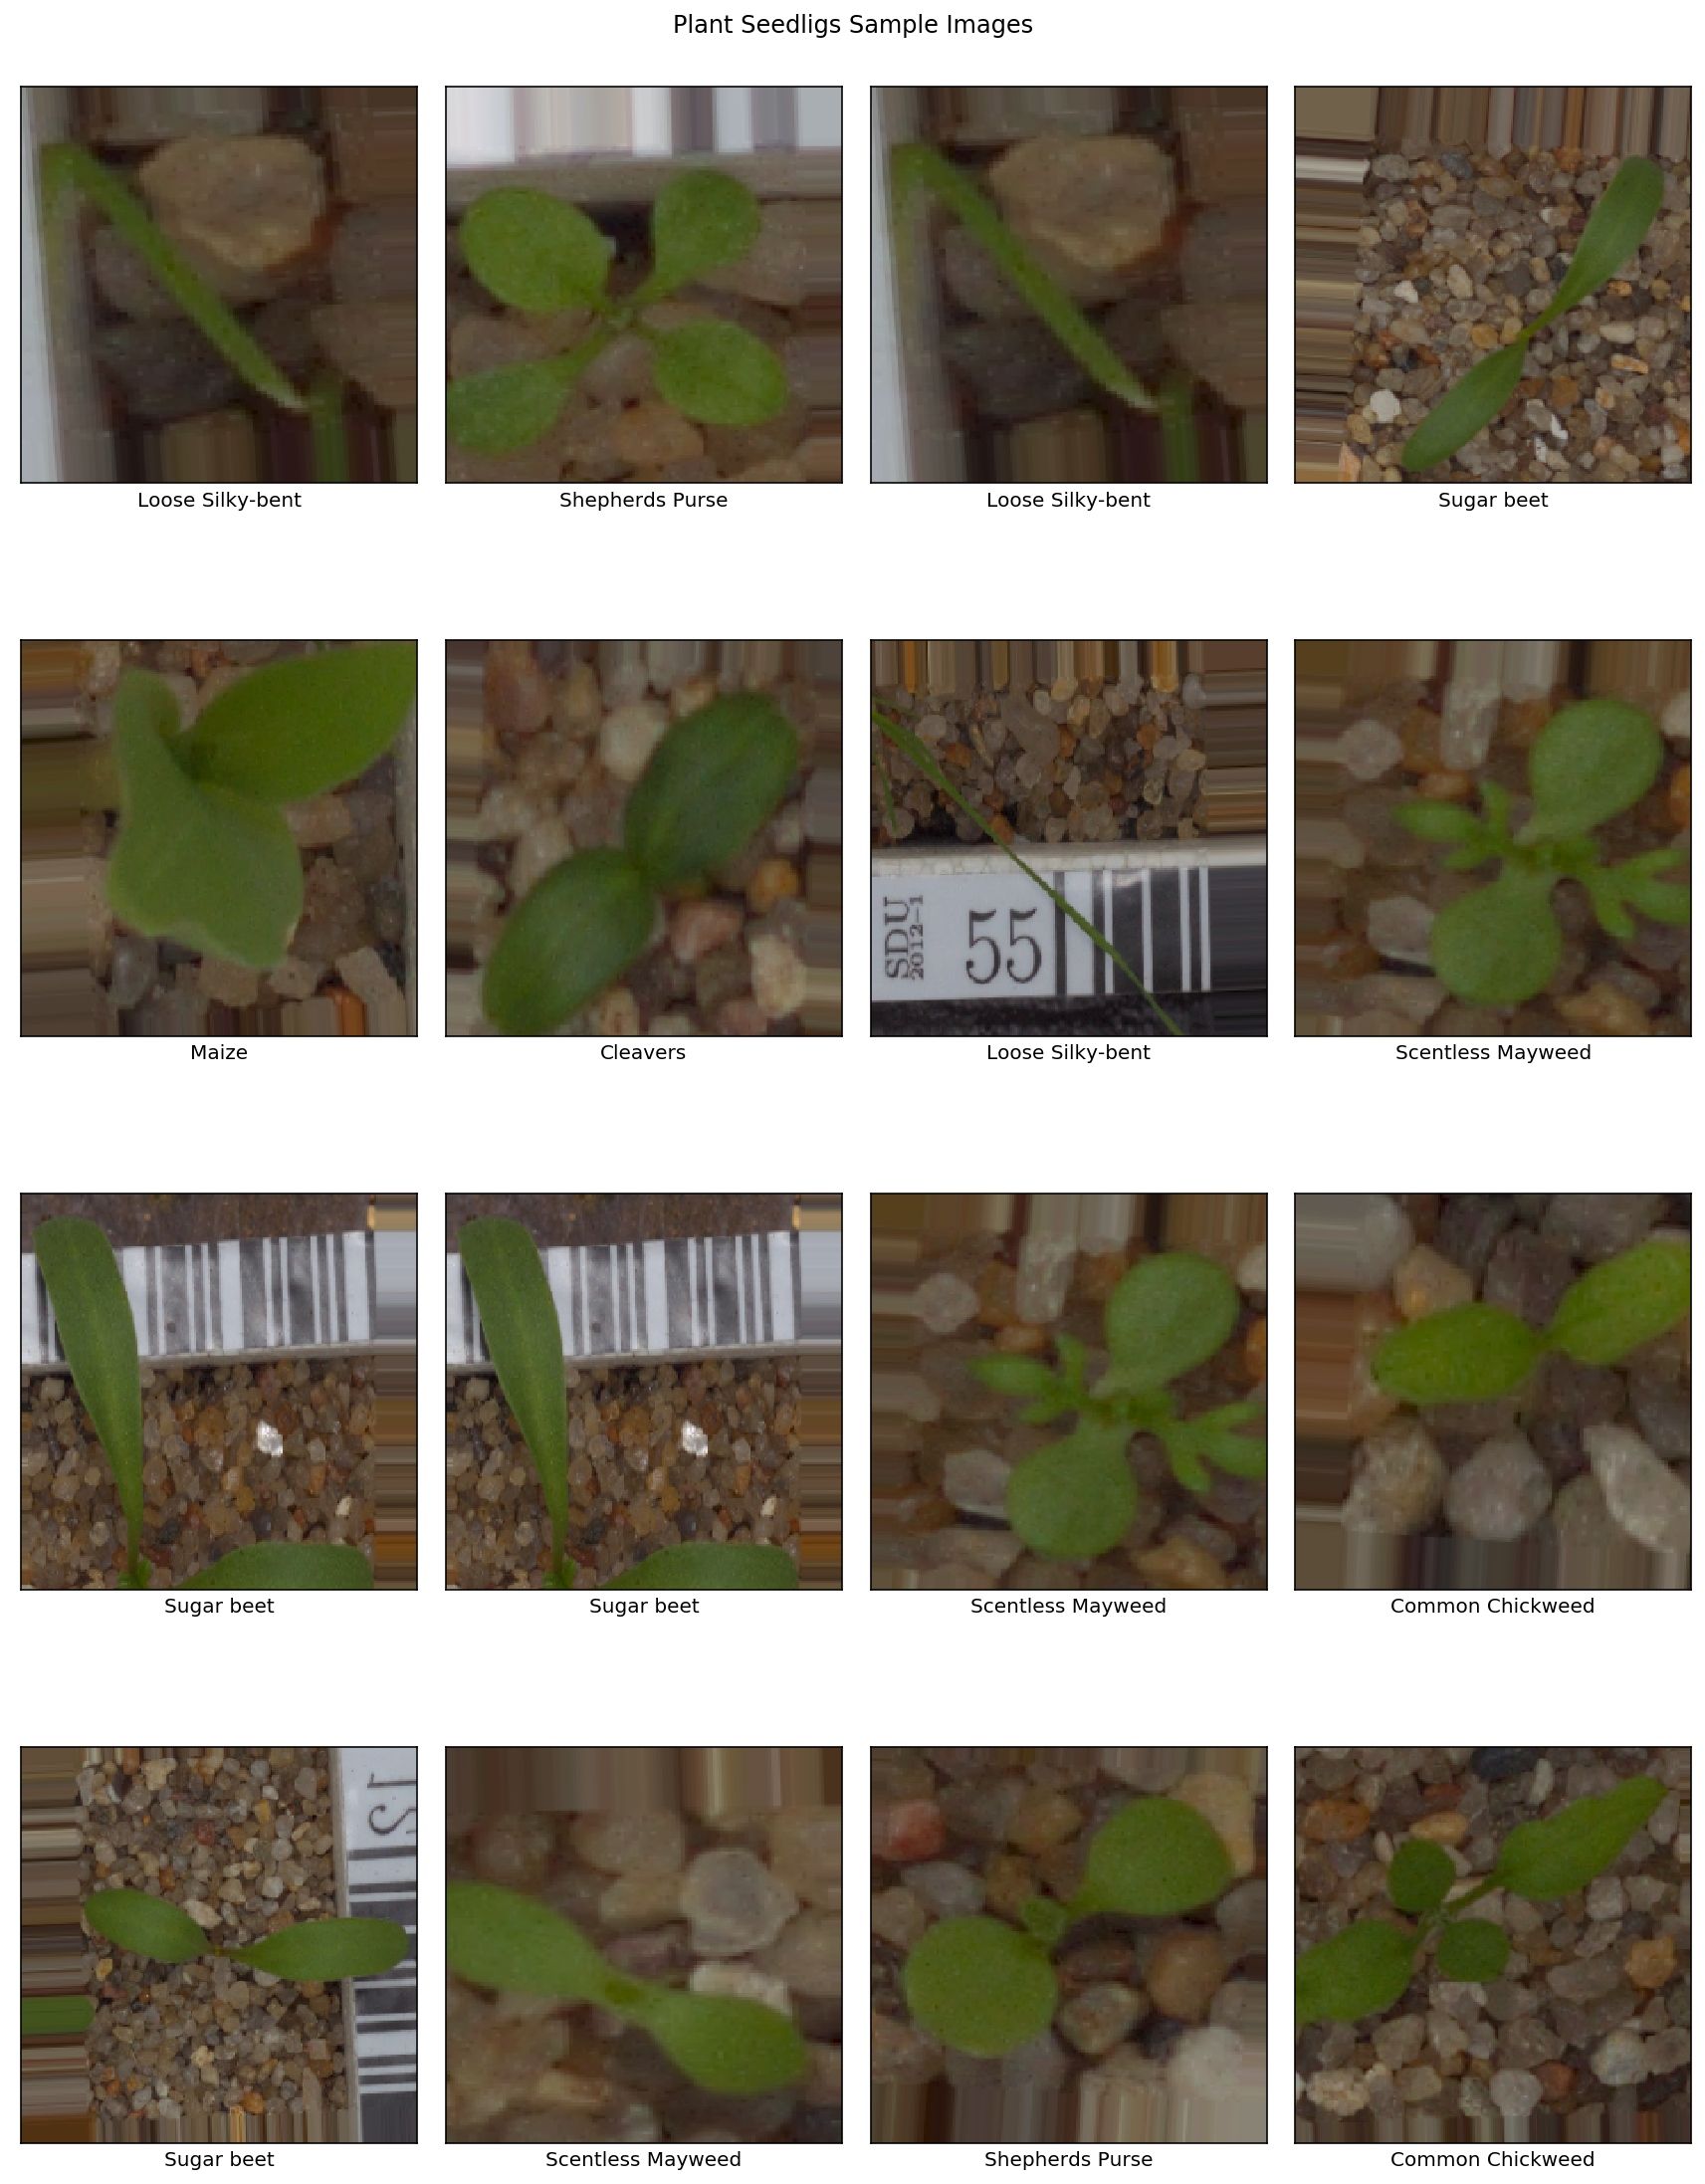

In [50]:
import random
ix, iy = next(train_generator)
fig = plt.figure(figsize=(12,16))
for i in range(16):
    idx = random.randint(0, ix.shape[0]-1)
    plt.subplot(4,4,i+1)
    plt.imshow(ix[idx,:,:].clip(0,255).astype(np.uint8), interpolation="nearest")
    plt.xlabel(cat_enc.classes_[int(iy[idx])])
    plt.grid(True)
    plt.xticks([])
    plt.yticks([])
plt.suptitle("Plant Seedligs Sample Images")
plt.tight_layout()
plt.show()

### Attention Model

In [54]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
in_lay = Input(ix.shape[1:])
base_pretrained_model = VGG16(input_shape=ix.shape[1:],
                              include_top=False, weights='imagenet')
base_pretrained_model.trainable = False

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
58892288/58889256 [==============================] - 3s 0us/step


In [0]:
pt_depth = base_pretrained_model.get_output_shape_at(0)[-1]
pt_features = base_pretrained_model(in_lay)
bn_features = BatchNormalization()(pt_features)

attn_layer = Conv2D(64, kernel_size=(1,1), padding="SAME", activation='relu')(bn_features)
attn_layer = Conv2D(16, kernel_size=(1,1),padding='SAME', activation='relu')(attn_layer)
attn_layer = Conv2D(1, kernel_size=(1,1), padding='valid',activation='sigmoid')(attn_layer)

#fan it out to all the channels
up_c2_w = np.ones((1,1,1,pt_depth))
up_c2 = Conv2D(pt_depth, kernel_size=(1,1), padding='SAME', activation='linear',use_bias=False,weights=[up_c2_w])
up_c2.trainable = False
attn_layer = up_c2(attn_layer)

mask_features = multiply([attn_layer, bn_features])
gap_features = GlobalAveragePooling2D()(mask_features)
gap_mask = GlobalAveragePooling2D()(attn_layer)
gap = Lambda(lambda x: x[0]/x[1], name="RescaleGAP")([gap_features, gap_mask])
gap_dr = Dropout(0.5)(gap)
dr_steps = Dropout(0.5)(Dense(128, activation='elu')(gap_dr))
out_layer = Dense(len(cat_enc.classes_), activation='softmax')(dr_steps)
tb_model = Model([in_lay],[out_layer])

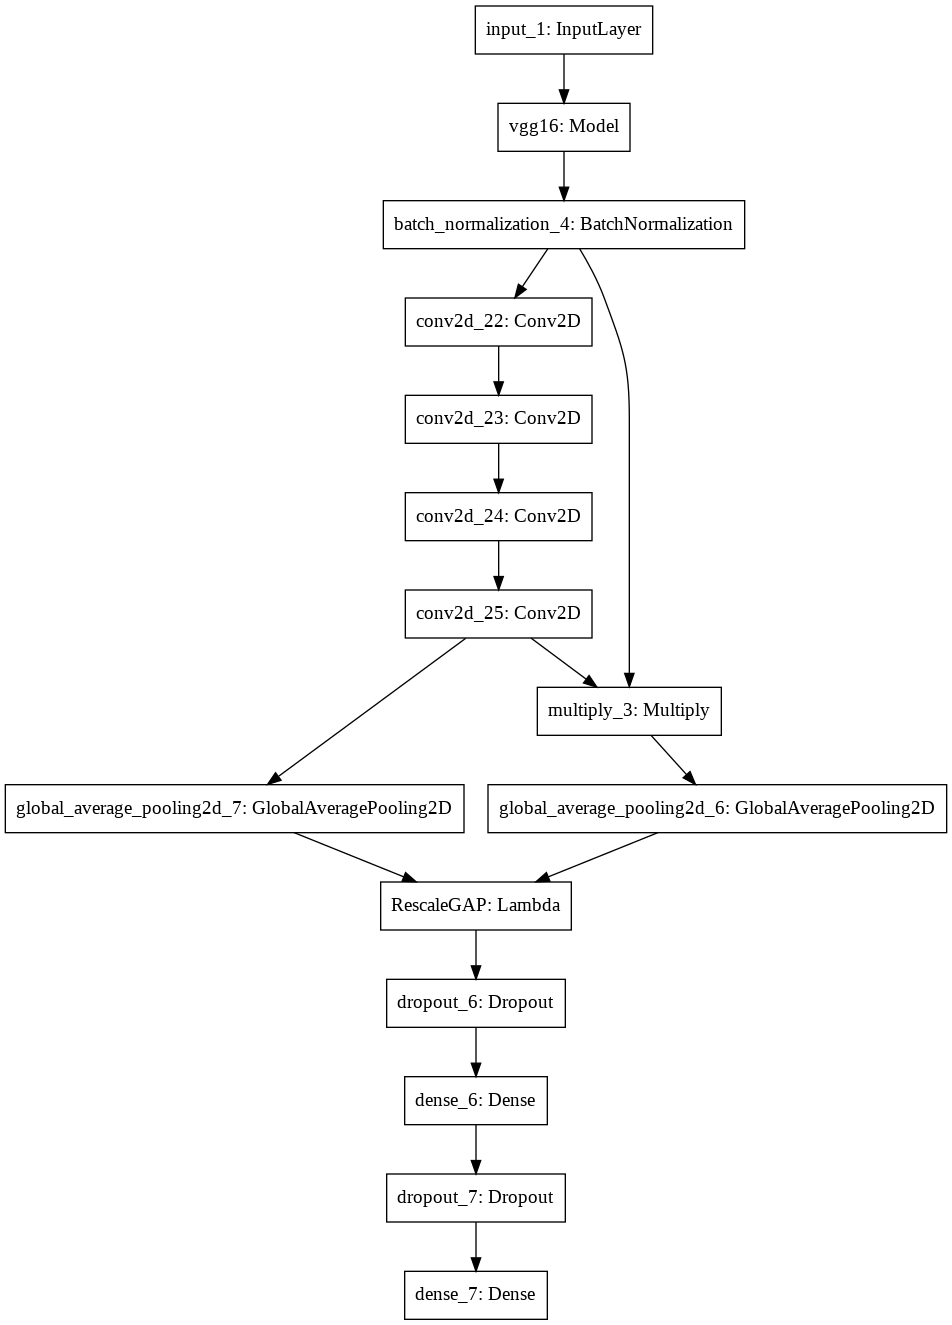

In [129]:
tf.keras.utils.plot_model(tb_model)

In [64]:

tb_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
vgg16 (Model)                   (None, 7, 7, 512)    14714688    input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 7, 7, 512)    2048        vgg16[2][0]                      
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 7, 7, 64)     32832       batch_normalization_1[0][0]      
______________________________________________________________________________________________

In [0]:
tb_model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [0]:
!rm -rf ~/.keras

In [69]:
%load_ext tensorboard
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard

weight_path = "{}_weights.best.hdf5".format('seedlings')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min', save_weights_only=True)

reduceLR = ReduceLROnPlateau(monitor="val_loss", factor=0.8, patience=10, verbose=1, mode="auto", epsilon=0.0001, cooldown=5, min_lr=0.0001)

earlyStop = EarlyStopping(monitor='val_loss',mode='min',patience=5,verbose=1)

tensorBoard = TensorBoard(log_dir="logs")

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
callbacks = [
             checkpoint,
             reduceLR,
             earlyStop,
             tensorBoard
]

In [71]:
tb_model.fit_generator(train_generator, 
                       steps_per_epoch=60,
                       validation_data=valid_generator,
                       verbose=1,
                       callbacks=callbacks,
                       epochs=5)

Epoch 1/5
 8/60 [===>..........................] - ETA: 4:18 - loss: 1.1211 - acc: 0.6642
Epoch 00001: val_loss improved from inf to 1.12105, saving model to seedlings_weights.best.hdf5
60/60 [==============================] - 240s 4s/step - loss: 1.8216 - acc: 0.3872 - val_loss: 1.1211 - val_acc: 0.6642
Epoch 2/5
 8/60 [===>..........................] - ETA: 3:42 - loss: 0.7162 - acc: 0.7687
Epoch 00002: val_loss improved from 1.12105 to 0.71623, saving model to seedlings_weights.best.hdf5
60/60 [==============================] - 202s 3s/step - loss: 1.1352 - acc: 0.6124 - val_loss: 0.7162 - val_acc: 0.7687
Epoch 3/5
 8/60 [===>..........................] - ETA: 3:38 - loss: 0.6511 - acc: 0.7983
Epoch 00003: val_loss improved from 0.71623 to 0.65109, saving model to seedlings_weights.best.hdf5
60/60 [==============================] - 204s 3s/step - loss: 0.9469 - acc: 0.6725 - val_loss: 0.6511 - val_acc: 0.7983
Epoch 4/5
 8/60 [===>..........................] - ETA: 3:35 - loss: 0.559

In [0]:
tb_model.load_weights(weight_path)

### Show Attention

In [150]:
layers = []
for attn_layer in tb_model.layers:
    c_shape = attn_layer.get_output_shape_at(0)
    if len(c_shape)==4:
        if c_shape[-1]==1:
            print(attn_layer)                    
            break

In [0]:
test_X, test_Y = next(train_generator)

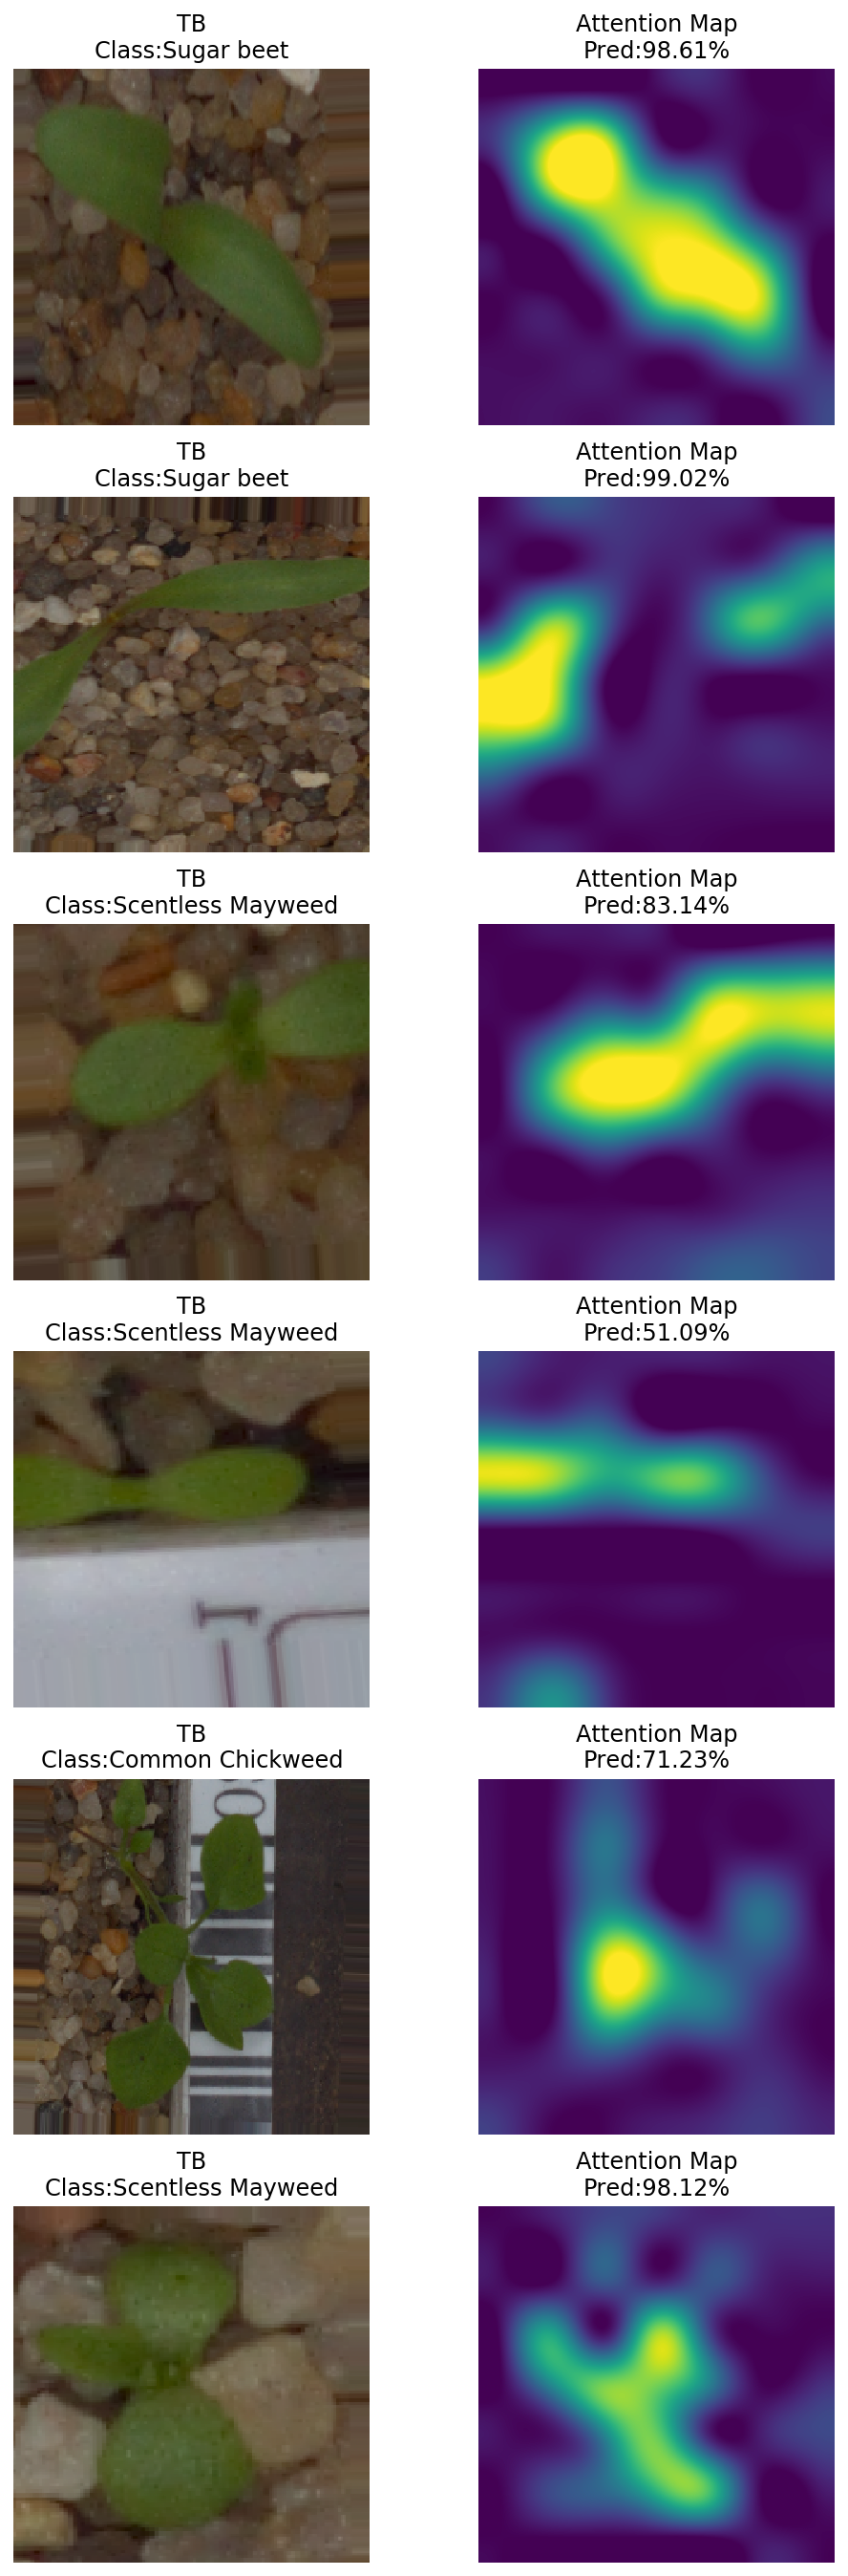

In [167]:
import tensorflow.keras.backend as K
rand_idx = np.random.choice(range(len(test_X)), size = 6)
attn_func = K.function(inputs = [tb_model.get_input_at(0), K.learning_phase()],
           outputs = [attn_layer.get_output_at(0)]
          )
fig, m_axs = plt.subplots(len(rand_idx), 2, figsize = (8, 4*len(rand_idx)))
[c_ax.axis('off') for c_ax in m_axs.flatten()]
for c_idx, (img_ax, attn_ax) in zip(rand_idx, m_axs):

    cur_img = test_X[c_idx:(c_idx+1)]

    attn_img = attn_func([cur_img, 0])[0]

    img_ax.imshow(cur_img[0,:,:].clip(0, 255).astype(np.uint8))

    attn_ax.imshow(attn_img[0, :, :, 0], cmap = 'viridis', 
                   vmin = 0, vmax = 1, 
                   interpolation = 'lanczos')
    
    real_label = test_Y[c_idx]

    img_ax.set_title('TB\nClass:%s' % (cat_enc.classes_[int(real_label)]))
    
    pred_confidence = tb_model.predict(cur_img)[0]
    
    attn_ax.set_title('Attention Map\nPred:{:.2f}%'.format(100 * pred_confidence[int(real_label)]))
fig.savefig('attention_map.png', dpi = 300)

In [170]:
pred_Y = tb_model.predict(test_X,verbose=2)
pred_Y_cat = np.argmax(pred_Y, axis=1)

128/128 - 1s


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set_style("whitegrid")
sns.set(rc={"figure.figsize":(10,8)})

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text xticklabel objects>)

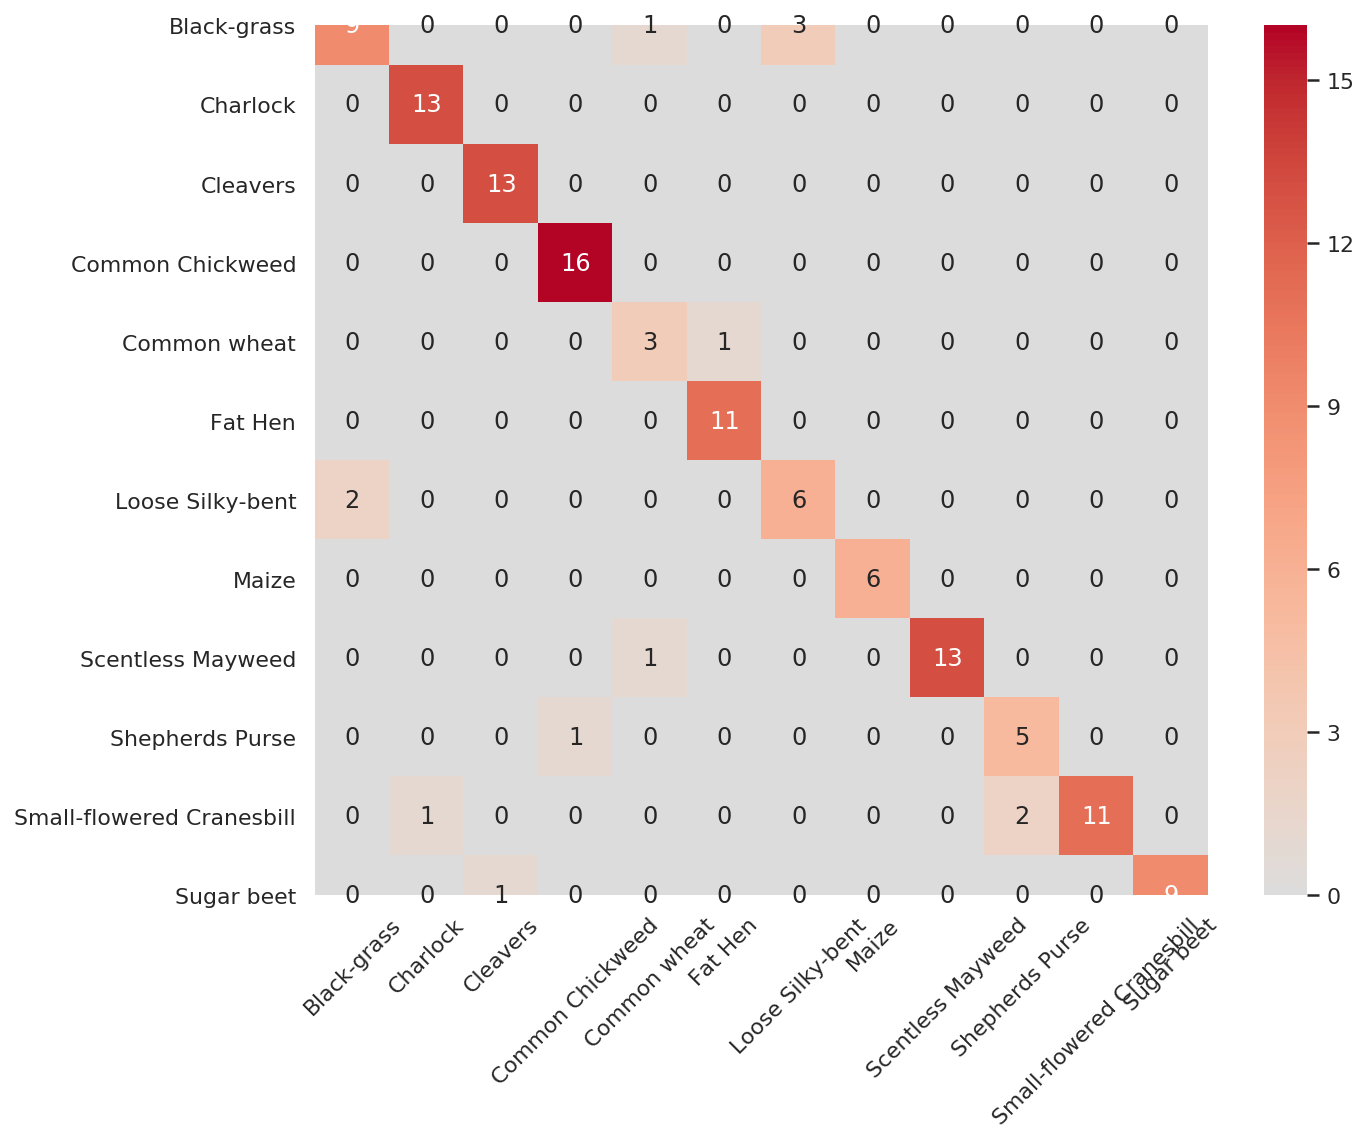

In [192]:
cm = confusion_matrix(pred_Y_cat, test_Y)

sns.heatmap(cm, 
            center=0, 
            annot=True,
            fmt="d",
            linewidths=0,
            cbar=True,
            xticklabels=cat_enc.classes_,
            yticklabels=cat_enc.classes_, 
            cmap="coolwarm")
plt.xticks(rotation=45)

In [194]:
print(classification_report(pred_Y_cat, test_Y))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.93      1.00      0.96        13
           2       0.93      1.00      0.96        13
           3       0.94      1.00      0.97        16
           4       0.60      0.75      0.67         4
           5       0.92      1.00      0.96        11
           6       0.67      0.75      0.71         8
           7       1.00      1.00      1.00         6
           8       1.00      0.93      0.96        14
           9       0.71      0.83      0.77         6
          10       1.00      0.79      0.88        14
          11       1.00      0.90      0.95        10

    accuracy                           0.90       128
   macro avg       0.88      0.89      0.88       128
weighted avg       0.91      0.90      0.90       128



### Vizualizing Positive Regions

In [195]:
dense_layers = [x for x in tb_model.layers if isinstance(x, Dense)]
last_layer = bn_features
for i, c_d in enumerate(dense_layers):
    W, b = c_d.get_weights()
    in_dim, out_dim = W.shape
    new_W = np.expand_dims(np.expand_dims(W,0),0)
    new_b = b
    last_layer = Conv2D(out_dim, 
                        kernel_size = (1,1), 
                        weights = (new_W, new_b),
                        activation = c_d.activation, 
                        name = 'd2cv_{}'.format(i))(last_layer)
viz_model = Model(inputs = [in_lay], 
                  outputs = [last_layer],
                  name = 'viz_model')
viz_model.summary()

Model: "viz_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
batch_normalization_4 (Batch (None, 7, 7, 512)         2048      
_________________________________________________________________
d2cv_0 (Conv2D)              (None, 7, 7, 128)         65664     
_________________________________________________________________
d2cv_1 (Conv2D)              (None, 7, 7, 12)          1548      
Total params: 14,783,948
Trainable params: 68,236
Non-trainable params: 14,715,712
_________________________________________________________________


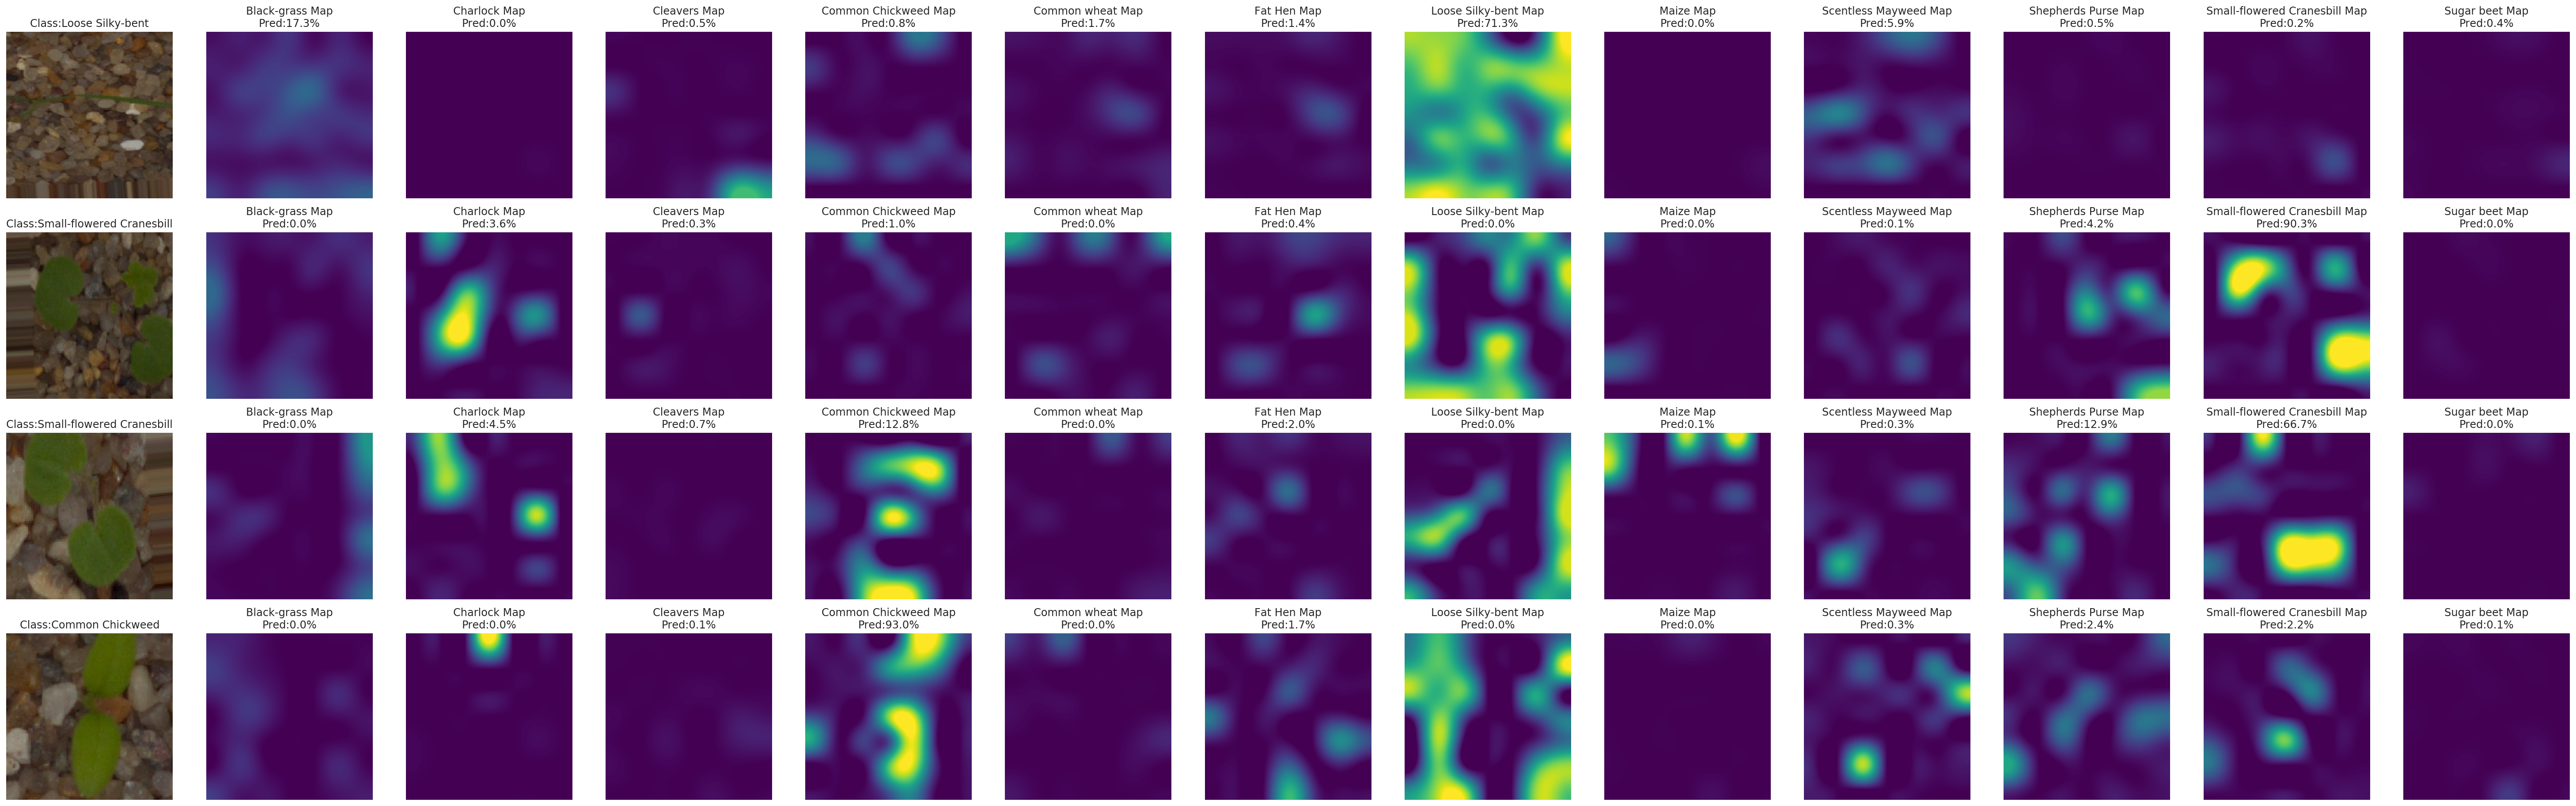

In [197]:
rand_idx = np.random.choice(range(len(test_X)), size = 4)
ch_count = viz_model.get_output_shape_at(0)[-1]
fig, m_axs = plt.subplots(len(rand_idx), 
                          1+ch_count, 
                          figsize = (4*(1+ch_count), 
                                     4*len(rand_idx)))
[c_ax.axis('off') for c_ax in m_axs.flatten()]
for c_idx, n_axs in zip(rand_idx, m_axs):
    cur_img = test_X[c_idx:(c_idx+1)]
    attn_img = viz_model.predict([cur_img])
    pred_confidence = tb_model.predict(cur_img)[0]
    n_axs[0].imshow(cur_img[0,:,:].clip(0, 255).astype(np.uint8))
    real_label = test_Y[c_idx]
    n_axs[0].set_title('Class:%s' % (cat_enc.classes_[int(real_label)]))
    for i, c_ax in enumerate(n_axs[1:]):
        c_ax.imshow(attn_img[0, :, :, i], cmap = 'viridis', 
                       vmin = 0, vmax = 1, 
                       interpolation = 'lanczos')
        c_ax.set_title('%s Map\nPred:%2.1f%%' % (cat_enc.classes_[i], 
                                                 100*pred_confidence[i]))
    
fig.savefig('positive_map.png', dpi = 300)